# Comparing iPhone and Samunsung J series users

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sklearn

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



I am going to study the differences between Iphone and Samsung J series users. First I will create two different dataframes, one with all the rows from iPhone users and the other one with all the rows of J series users. First I am going to decide which rows should be dropped in case of having NaN values.

<font size="1" color="gray"></font>

In [98]:
#We upload the database
database = pd.read_csv("device_db.csv", sep=",")

If there is no data in "PURCHASED_DEVICE" or "DEVICE_VALUE" we remove those cells. If "DATA_TRAFFIC_MONTH_(1..6)", "VOICE_TRAFFIC_MONTH_(1..6)", "BILLING_MONTH_(1..6)", or "DEVICE_COST_MONTH_(1..6)" have NaN values we will consider them to be 0.
<font size="1" color="white"></font>

In [99]:
#Now i will drop and fill the rows just explained.
data_traffic = [col for col in clear_db.columns if ("DATA_TRAFFIC" in col) ]
voice_traffic = [col for col in clear_db.columns if ("VOICE_TRAFFIC" in col) ]
billing_month = [col for col in clear_db.columns if ("BILLING_MONTH" in col) ]
device_cost = [col for col in clear_db.columns if ("DEVICE_COST" in col) ]
columns_to_clear = data_traffic + voice_traffic + billing_month + device_cost

clear_db = database

for col in database.columns:
    if col in columns_to_clear: 
        clear_db[col] = clear_db[col].fillna(0)

clear_db = clear_db.dropna(subset=['PURCHASED_DEVICE','DEVICE_VALUE'])
database = clear_db

Now that we have cleared the database I want to filter it into two databases. One for J series Samsung users and the other for iPhone users. Using the variable "PURCHASED_DEVICE" I am creating a function in order to transform the categorical value into a numerical one.
<font size="1" color="white"></font>

In [100]:
def extract_brand(device_name):
    # Splitting the string by underscore
    parts = device_name.split('_')
    # Checking if the second part contains "Samsung" or "iPhone"
    if len(parts) > 1:
        if "SAMSUNG" in parts[1]:
            return 1
        elif "APPLE" in parts[1]:
            return 2
        else: return 0

I add a column to the dataframe with the numerical version of "PURCHASED_DEVICE".
<font size="1" color="black"></font>

In [109]:
brand_code = []
for name in database["PURCHASED_DEVICE"]:
    #print(name)
    brand = extract_brand(str(name))
    brand_code.append(brand)
print(brand_code)

[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 

If the brand code of the row is 1 we add the row to the samsung users dataframe, and if it has a 2 to the Apple user dataframe.


In [116]:
database["brand_code"] = brand_code
samsung_users =pd.DataFrame(columns=database.columns)
apple_users =pd.DataFrame(columns=database.columns)
samsung_users = database[database["brand_code"] == 1]
apple_users = database[database["brand_code"] == 2]


Now that we have samsung and apple users are separated we can proceed to compare their data. I will study 2 different topics to compare them between the 2 groups. I will make a device analysis using 'DEVICE_VALUE' and 'DEVICE_COST_MONTH_,  and a Traffic analysis using DATA_TRAFFIC_MONTH_1'. I will compare their distributions and descriptive statistics and make data visualtization.


# Study of the Device value and cost/moth in Samsung J series users vs iPhone users


## Device value study

In [117]:
columns = ["DEVICE_VALUE"] +[col for col in clear_db.columns if ("DEVICE_COST" in col) ]
samsung_users[columns].describe()


,DEVICE_VALUE,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6
count,1747.000000,1747.00000,1747.000000,1747.000000,1747.000000,1747.000000,1747.000000
mean,1054.468231,13.26166,9.264568,11.769101,10.950177,11.861723,12.009038
std,1006.502981,157.24796,26.494162,65.212590,27.701845,40.618728,29.761351
min,44.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,489.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,609.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.000000,7.00000,9.000000,12.000000,12.000000,12.000000,13.000000
max,6033.000000,6440.00000,366.000000,2466.000000,258.750000,1258.000000,265.370000


In [118]:
columns = ["DEVICE_VALUE"] +[col for col in clear_db.columns if ("DEVICE_COST" in col) ]
apple_users[columns].describe()

,DEVICE_VALUE,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,3552.806061,19.276455,20.391788,21.483303,22.835939,24.039455,24.367091
std,1273.911899,48.649999,49.546103,50.604150,52.000999,53.228301,53.505257
min,1305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2682.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3245.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4233.000000,7.000000,9.250000,12.000000,12.000000,13.000000,13.000000
max,9057.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000


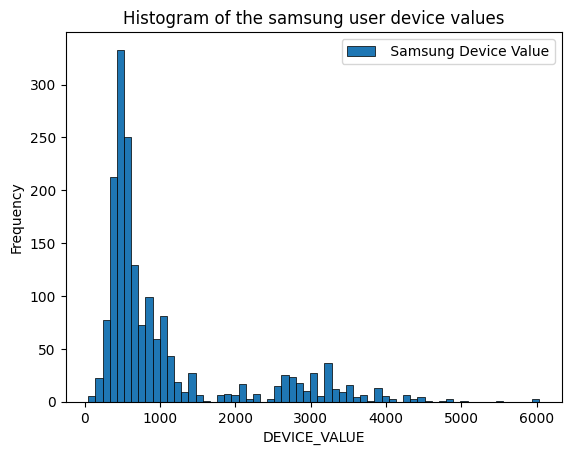

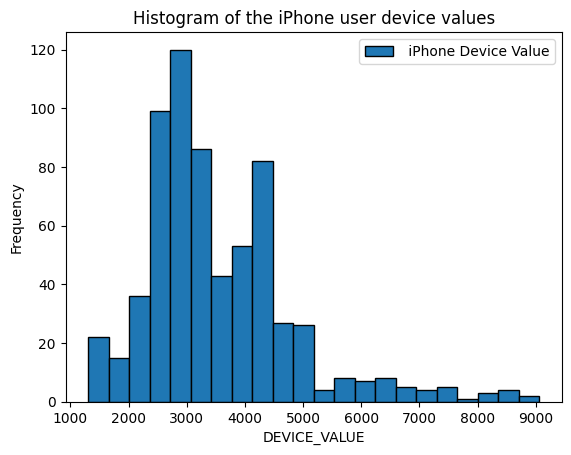

In [119]:
sns.histplot(samsung_users, x = "DEVICE_VALUE", kde = False, alpha = 1, label = " Samsung Device Value")
# Adding labels and title
plt.xlabel('DEVICE_VALUE')
plt.ylabel('Frequency')
plt.title('Histogram of the samsung user device values')
# Adding legend
plt.legend()
# Showing plot
plt.show()

sns.histplot(apple_users, x = "DEVICE_VALUE", kde = False, alpha = 1, label = " iPhone Device Value")
# Adding labels and title
plt.xlabel('DEVICE_VALUE')
plt.ylabel('Frequency')
plt.title('Histogram of the iPhone user device values')
# Adding legend
plt.legend()
# Showing plot
plt.show()

First we can compare the basic statistics from both datasets in the variable "DEVICE_VALUE":

- If we look at the mean, we have 1054.46 for samsung devices and 3552.806 for iPhone devices. So the usual Apple buyer is willing to spend more 3.37 times more on his device than a samsung user. This price difference should explain also why there is almost 3 times more Samsung buyers than Apple buyers.

- By looking at the range of the variable in both subsets we can clearly define the market strategies of each brand. Samsung has a higher range of prices in their products, creating a brand more accessible for high, medium and low ends users, while iPhone has a more limited range, defining a brand dedicated to medium and high end devices. 

- This last point explained, can also be related to the fact of samsung having a higher variability (standard deviation) than Apple.

Then, we can also compare the shape of the distributions on the histogram.

- We can see a multimodal distribution for Samsung devices. We could say that there are 3 "mountains" one at the left of the histogram, one at the middle and a very little one at the right extreme. That reinforces my previous conclusion of how Samsung strategy is to produce on all the possible ranges of values devices. On the other hand the iPhone dataset produces a more unimodal histiogram, proving that they center their product on a single type of quality.

- Of course, the histograms reflect also the conclusions extracted from the basic statistics, iphone users spend more money in their device than samsung clients.

## Device cost/month

To study the behaviour of this feature in each sample I will merge 6 variables containing the money that each user spent on devices expenses from month 1 to month 6, so i will study the new feature "total_DEVICE_COST". These expenses come from services that the users buys. 

In [120]:
columns = [col for col in clear_db.columns if ("DEVICE_COST" in col) ]
samsung_users["total_DEVICE_COST"] = samsung_users[columns].sum(axis=1)
samsung_users["total_DEVICE_COST"].describe()


C:\Users\Jorge\AppData\Local\Temp\ipykernel_17808\4028908352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_users["total_DEVICE_COST"] = samsung_users[columns].sum(axis=1)


count    1747.000000
mean       69.116268
std       247.584366
min         0.000000
25%         0.000000
50%         0.000000
75%        72.000000
max      7544.000000
Name: total_DEVICE_COST, dtype: float64

In [121]:
columns = [col for col in clear_db.columns if ("DEVICE_COST" in col) ]
apple_users["total_DEVICE_COST"] = apple_users[columns].sum(axis=1)
apple_users["total_DEVICE_COST"].describe()

C:\Users\Jorge\AppData\Local\Temp\ipykernel_17808\1602163415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_users["total_DEVICE_COST"] = apple_users[columns].sum(axis=1)


count     660.000000
mean      132.394030
std       298.072744
min         0.000000
25%         0.000000
50%         0.000000
75%        72.000000
max      2466.000000
Name: total_DEVICE_COST, dtype: float64

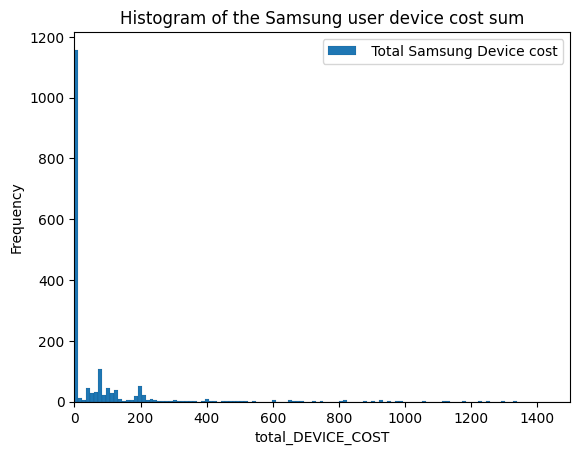

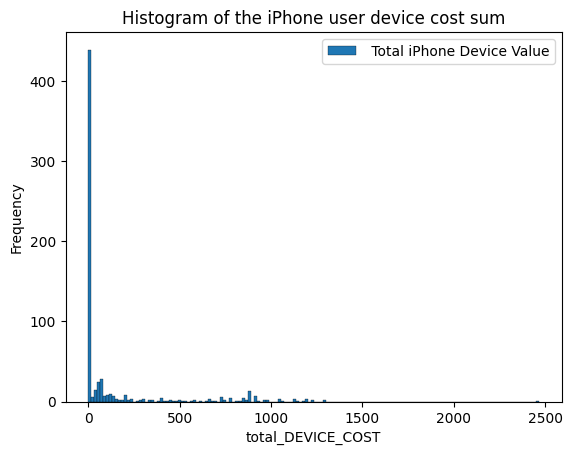

In [122]:
sns.histplot(samsung_users, x = "total_DEVICE_COST", kde = False, alpha = 1, label = " Total Samsung Device cost")
# Adding labels and title
plt.xlabel('total_DEVICE_COST')
plt.ylabel('Frequency')
plt.title('Histogram of the Samsung user device cost sum')
# Adding legend
plt.legend()
# Showing plot
plt.xlim(0, 1500)
plt.show()

sns.histplot(apple_users, x = "total_DEVICE_COST", kde = False, alpha = 1, label = " Total iPhone Device Value")
# Adding labels and title
plt.xlabel('total_DEVICE_COST')
plt.ylabel('Frequency')
plt.title('Histogram of the iPhone user device cost sum')
# Adding legend
plt.legend()
# Showing plot
plt.show()


First we can compare the basic statistics from both datasets in the variable:

- If we look at the mean, we have 69.11 for samsung devices and 132.39 for iPhone devices. Apple users not only spend more on their devices but also in different services related to it


Then, we can also compare the shape of the distributions on the histogram.

- We can see how both histograms are left skewed and we could say unimodal. The difference between them is obvious, samsung users spend less money than iPhone users after buying the device.

## Conclusions

1. Both brands have different market strategies. Apple aims to keep a public that is willing to spend more money on its device, and probably that has a higher income. On the other hand, Samsung marjet model aims to have a bigger spectrum of users, offering more type of products to reach more clients. 

2. Product Strategy:

    - Samsung's multimodal distribution of device values indicates a diverse product portfolio, while Apple's unimodal distribution reflects a more targeted approach centered around a specific quality tier.
    - This suggests that Samsung aims to capture market share by offering products across a wide spectrum of price points, while Apple prioritizes brand loyalty and premium positioning.

3. Brand Perception:

    - Apple's concentration on medium to high-end devices reinforces its reputation as a premium brand, attracting users who prioritize quality and status.
    - Samsung's broader product range may appeal to a wider audience, including users seeking affordable options without compromising on features and functionality.


# Study of the traffic features in Samsung J series users vs iPhone users
